In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

# Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.


1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

1.2  Do you think scaling is necessary for clustering in this case? Justify

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

### Data Dictionary for Market Segmentation:

    spending: Amount spent by the customer per month (in 1000s)
    advance_payments: Amount paid by the customer in advance by cash (in 100s)
    probability_of_full_payment: Probability of payment done in full by the customer to the bank
    current_balance: Balance amount left in the account to make purchases (in 1000s)
    credit_limit: Limit of the amount in credit card (10000s)
    min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
    max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

### 1.1 Read the data and do exploratory data analysis (3 pts). Describe the data briefly. Interpret the inferences for each (3 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [2]:
bank = pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
bank.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [6]:
bank.duplicated().sum()

0

In [7]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


# Univariate Analysis

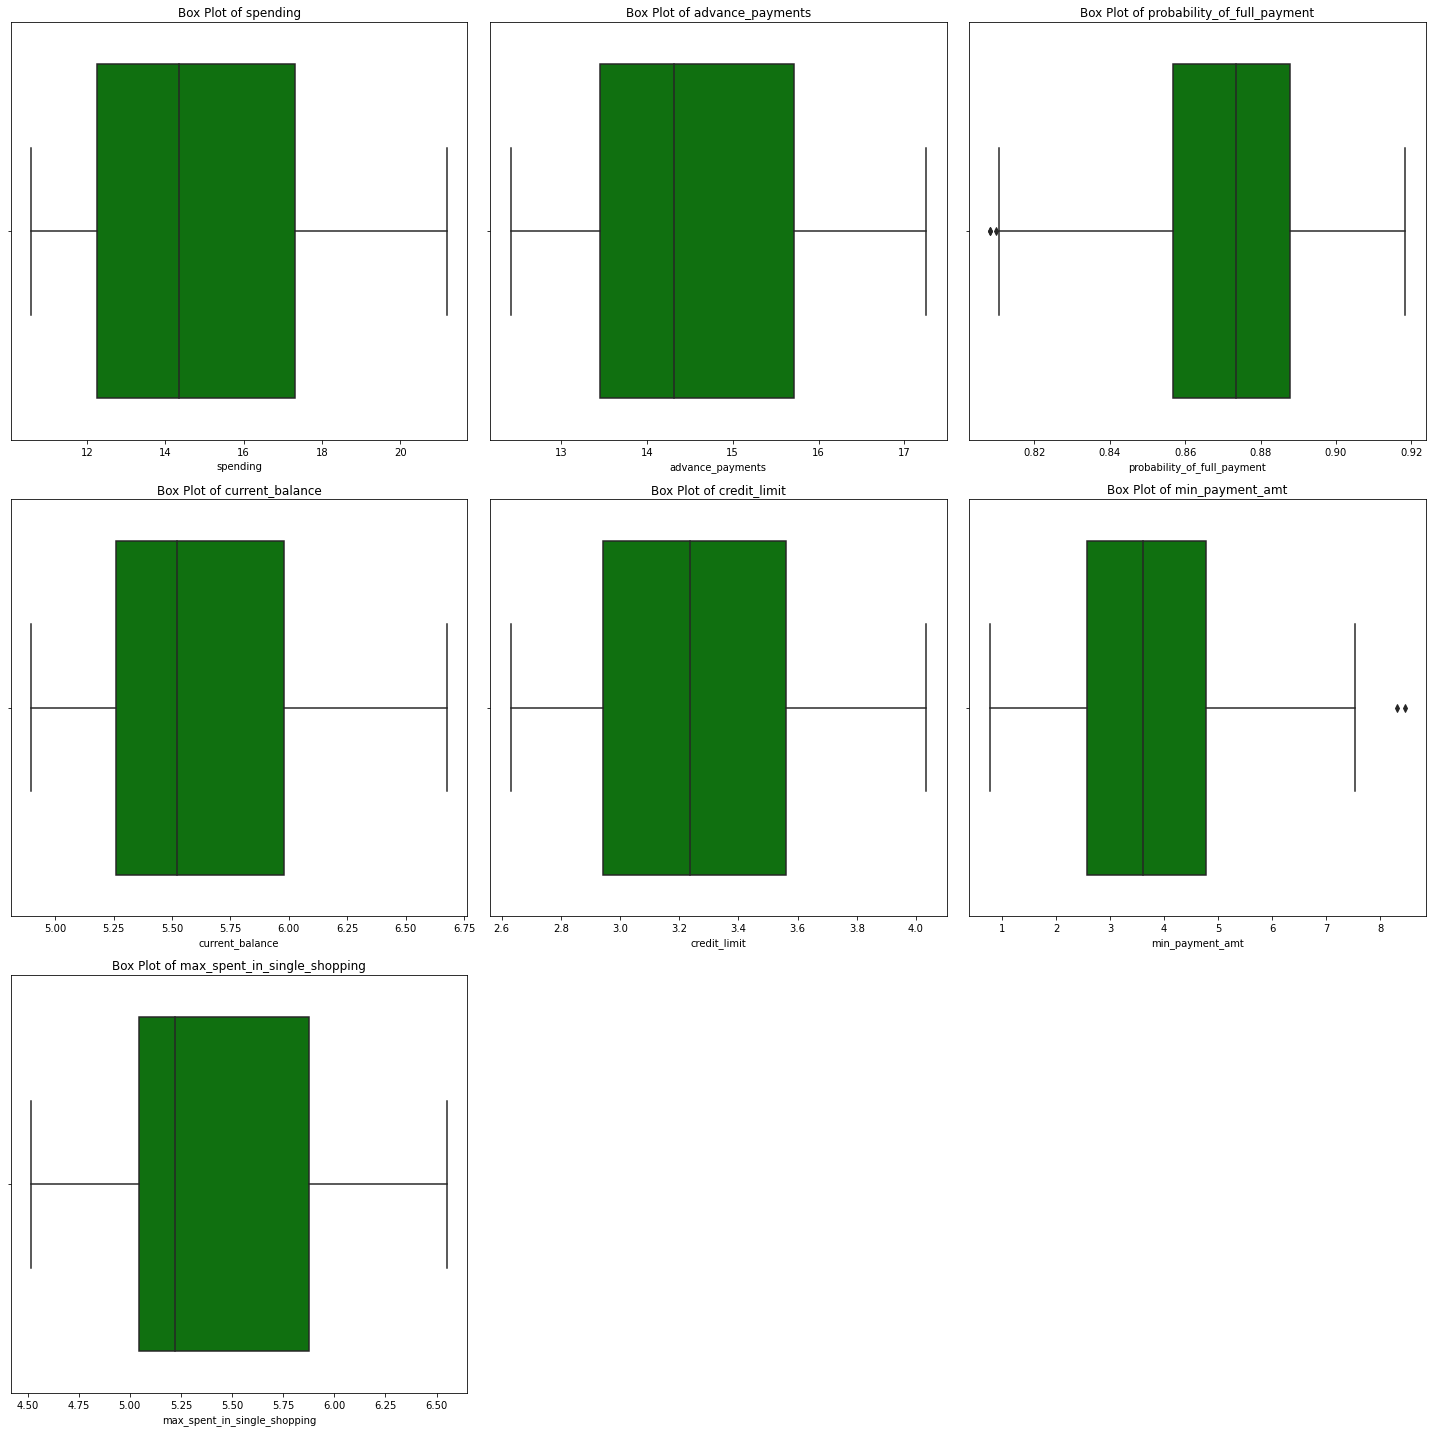

In [8]:
plt.figure(figsize = (20,20))
feature_list = bank.columns
for i in range(len(feature_list)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=bank[feature_list[i]], color='g')
    plt.title('Box Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

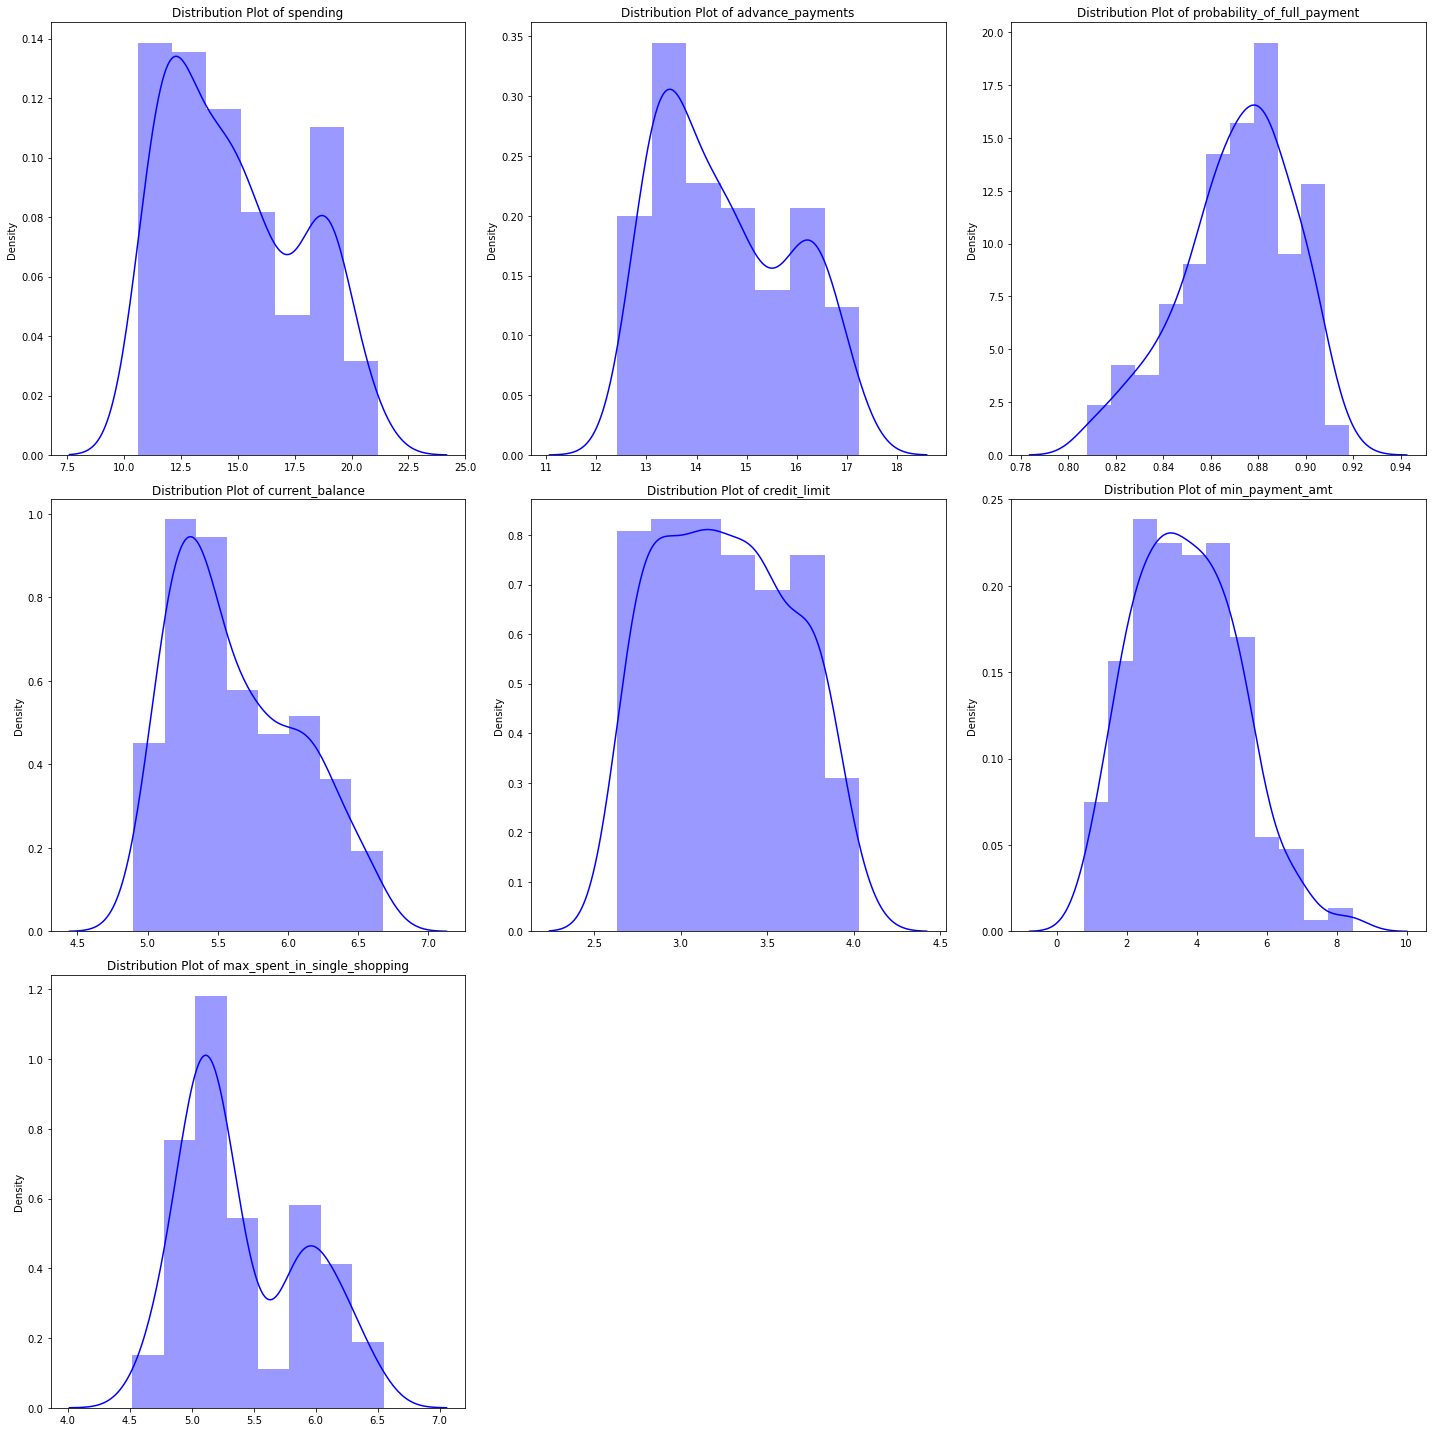

In [9]:
plt.figure(figsize = (20,20))
feature_list = bank.columns
for i in range(len(feature_list)):
    plt.subplot(3,3,i+1)
    sns.distplot(x=bank[feature_list[i]], color='b',fit=None)
    plt.title('Distribution Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [10]:
bank.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

# Bivariate Analysis

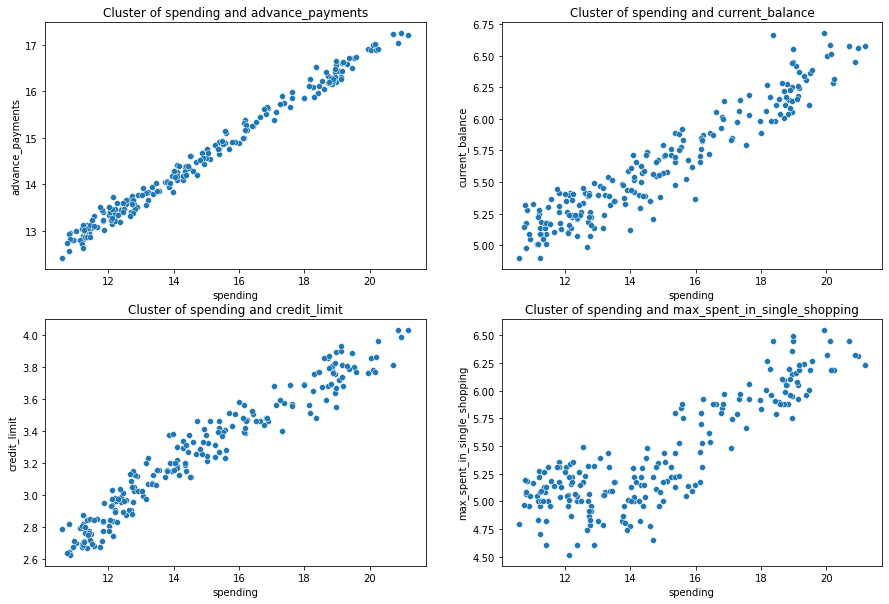

In [11]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.scatterplot(x='spending', y='advance_payments', data=bank)
plt.title('Cluster of spending and advance_payments')

plt.subplot(2,2,2)
sns.scatterplot( x='spending', y='current_balance', data=bank)
plt.title('Cluster of spending and current_balance')

plt.subplot(2,2,3)
sns.scatterplot(x='spending', y='credit_limit', data=bank)
plt.title('Cluster of spending and credit_limit');

plt.subplot(2,2,4)
sns.scatterplot(x='spending', y='max_spent_in_single_shopping', data=bank)
plt.title('Cluster of spending and max_spent_in_single_shopping');



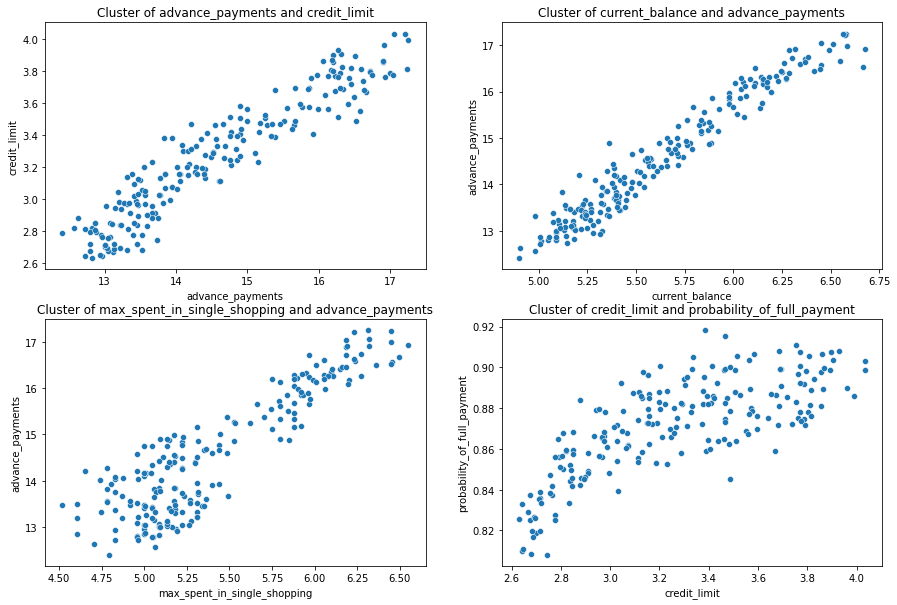

In [12]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.scatterplot(x='advance_payments', y='credit_limit', data=bank)
plt.title('Cluster of advance_payments and credit_limit');

plt.subplot(2,2,2)
sns.scatterplot(x='current_balance', y='advance_payments', data=bank)
plt.title('Cluster of current_balance and advance_payments');

plt.subplot(2,2,3)
sns.scatterplot(x='max_spent_in_single_shopping', y='advance_payments', data=bank)
plt.title('Cluster of max_spent_in_single_shopping and advance_payments');

plt.subplot(2,2,4)
sns.scatterplot(x='credit_limit', y='probability_of_full_payment', data=bank)
plt.title('Cluster of credit_limit and probability_of_full_payment');

# Multivariate Analysis

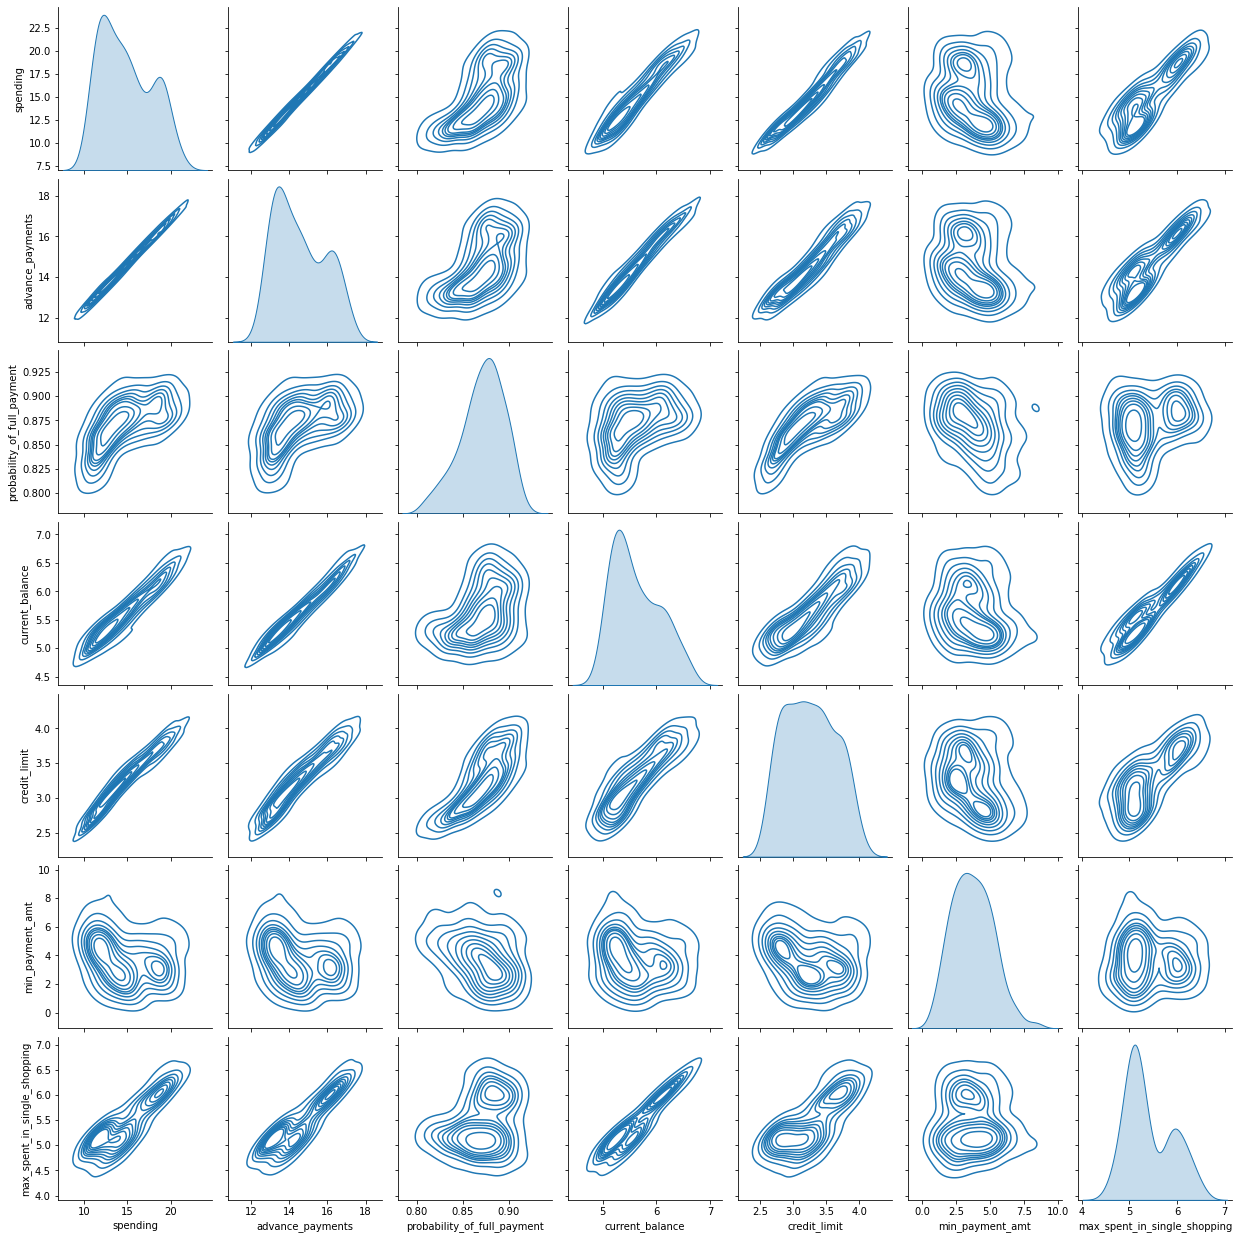

In [13]:
sns.pairplot(bank,kind='kde')

<AxesSubplot:>

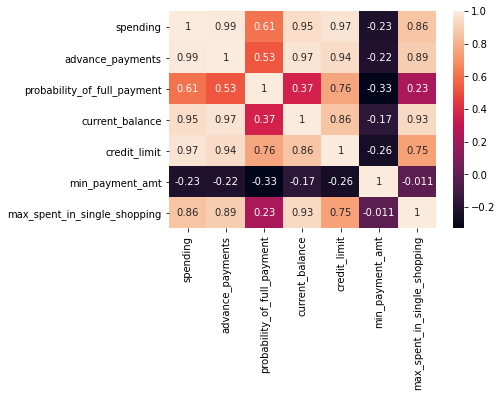

In [14]:
g = bank.corr()
sns.heatmap(g,annot=True)

### 1.2 Do you think scaling is necessary for clustering in this case? Justify The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling and which method is he/she using to do the scaling. Can also comment on how that method works.

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
bank_scaled = sc.fit_transform(bank)

In [16]:
bank_scaled = pd.DataFrame(bank_scaled,columns=bank.columns)

In [17]:
bank_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


<AxesSubplot:>

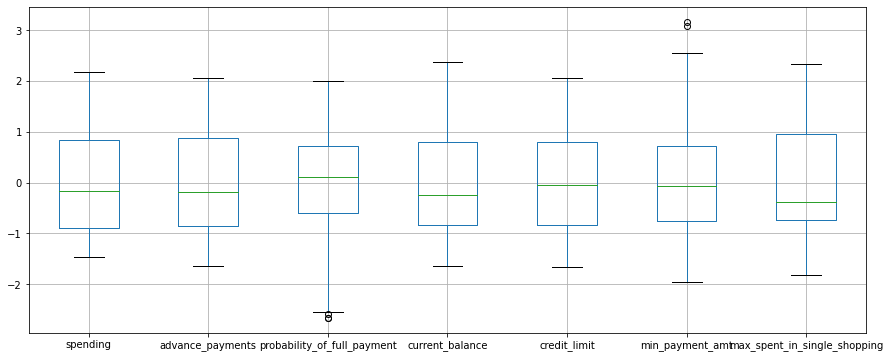

In [18]:
plt.figure(figsize=(15,6))
bank_scaled.boxplot()

### 1.3 Apply hierarchical clustering to scaled data (3 pts). Identify the number of optimum clusters using Dendrogram and briefly describe them (4). Students are expected to apply hierarchical clustering. It can be obtained via Fclusters or Agglomerative Clustering. Report should talk about the used criterion, affinity and linkage. Report must contain a Dendrogram and a logical reason behind choosing the optimum number of clusters and Inferences on the dendrogram. Customer segmentation can be visualized using limited features or whole data but it should be clear, correct and logical. Use appropriate plots to visualize the clusters.

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

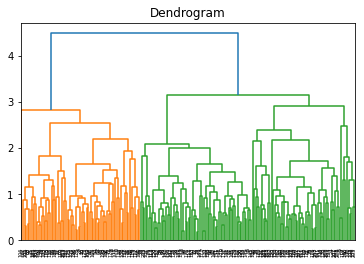

In [20]:
linkage = linkage(bank_scaled, method='average')
dend1 = dendrogram(linkage)
plt.title('Dendrogram')
plt.show();

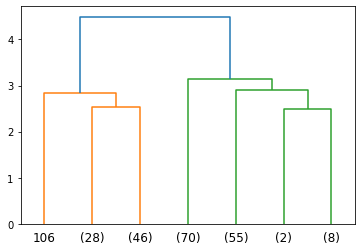

In [21]:
dend = dendrogram(linkage, truncate_mode='lastp', p=7)

In [22]:
from scipy.cluster.hierarchy import fcluster

In [23]:
clusters = fcluster(linkage, t=3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [24]:
# Adding the cluster profiles to the original dataset
bank['clusters'] = clusters

In [25]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [26]:
agg_bank1 = bank.iloc[:,0:8].groupby('clusters').mean()
agg_bank1['frequency'] = bank.clusters.value_counts().sort_index()
agg_bank1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,frequency
clusters,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters (2 pts). Apply elbow curve and silhouette score (3 pts). Interpret the inferences from the model (2.5 pts). K-means clustering code application with different number of clusters. Calculation of WSS(inertia for each value of k) Elbow Method must be applied and visualized with different values of K. Reasoning behind the selection of the optimal value of K must be explained properly. Silhouette Score must be calculated for the same values of K taken above and commented on. Report must contain logical and correct explanations for choosing the optimum clusters using both elbow method and silhouette scores. Append cluster labels obtained from K-means clustering into the original data frame. Customer Segmentation can be visualized using appropriate graphs.

In [27]:
from sklearn.cluster import KMeans

In [28]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(bank_scaled)
    wss.append(KM.inertia_)

In [29]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.301721277542,
 327.9608240079031,
 290.5900305968219,
 264.83153087478144,
 240.6837259501598,
 220.85285825594738,
 206.3829103601579]

In [30]:
a=[1,2,3,4,5,6,7,8,9,10]

<AxesSubplot:>

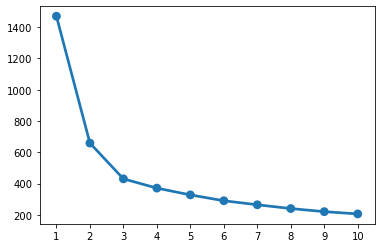

In [31]:
sns.pointplot(a,wss)

### KMeans with K=3

In [32]:
k_means = KMeans(n_clusters=2,random_state=1)
k_means.fit(bank_scaled)
labels = k_means.labels_

### Cluster evaluation for 3 clusters: the silhouette score

In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [34]:
sil_wid=[]
for i in range(2,11):
    KM = KMeans(n_clusters=i)
    KM.fit(bank_scaled)
    labels = KM.labels_
    sil = silhouette_score(bank_scaled,labels)
    print(i,'cluster','=', sil)
    sil_wid.append(sil)

2 cluster = 0.46577247686580914
3 cluster = 0.40072705527512986
4 cluster = 0.3369008229710853
5 cluster = 0.2822684561432708
6 cluster = 0.2847032852492907
7 cluster = 0.2751323853235638
8 cluster = 0.24805149565685716
9 cluster = 0.25345376834843464
10 cluster = 0.2584565800031015


In [35]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(bank_scaled)
labels = k_means.labels_

In [36]:
silhouette_score(bank_scaled,labels,random_state=1)

0.32757426605518075

<AxesSubplot:>

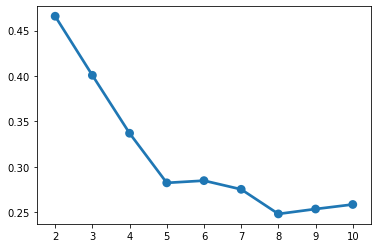

In [37]:
sns.pointplot(x=np.arange(2,11),y=sil_wid)

In [38]:
bank_kmeans = bank_scaled

In [39]:
bank_kmeans['clusters'] = k_means.labels_
bank_kmeans.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,1
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,0
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,1
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,3
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,1


In [40]:
bank_kmeans['clusters'].value_counts().sort_index()

0    67
1    49
2    30
3    64
Name: clusters, dtype: int64

In [41]:
aggdata_kmeans = bank_kmeans.iloc[:,0:8].groupby('clusters').mean()
aggdata_kmeans['frequency'] = bank_kmeans.clusters.value_counts().sort_index()
aggdata_kmeans

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,frequency
clusters,,,,,,,,
0,-0.307757,-0.355618,0.426299,-0.459091,-0.134574,-0.737986,-0.783021,67
1,1.471865,1.458268,0.665468,1.445071,1.353473,-0.151484,1.463988,49
2,0.506348,0.559325,0.249356,0.534531,0.493157,0.112246,0.567932,30
3,-1.042065,-1.006382,-1.072667,-0.876334,-1.126538,0.835944,-0.567358,64


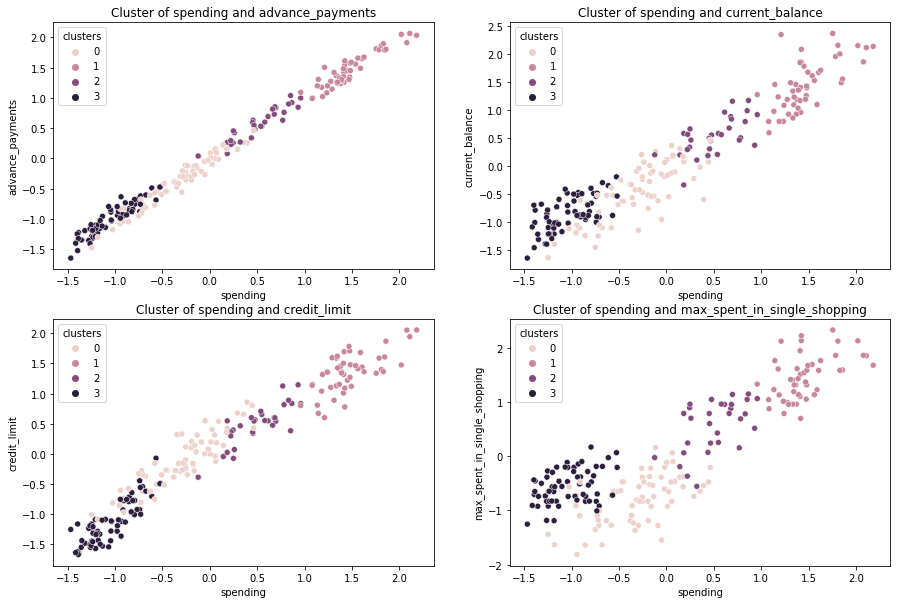

In [42]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.scatterplot(x='spending', y='advance_payments', hue='clusters', data=bank_kmeans)
plt.title('Cluster of spending and advance_payments')

plt.subplot(2,2,2)
sns.scatterplot( x='spending', y='current_balance', hue='clusters', data=bank_kmeans)
plt.title('Cluster of spending and current_balance')

plt.subplot(2,2,3)
sns.scatterplot(x='spending', y='credit_limit', hue='clusters', data=bank_kmeans)
plt.title('Cluster of spending and credit_limit');

plt.subplot(2,2,4)
sns.scatterplot(x='spending', y='max_spent_in_single_shopping', hue='clusters', data=bank_kmeans)
plt.title('Cluster of spending and max_spent_in_single_shopping');



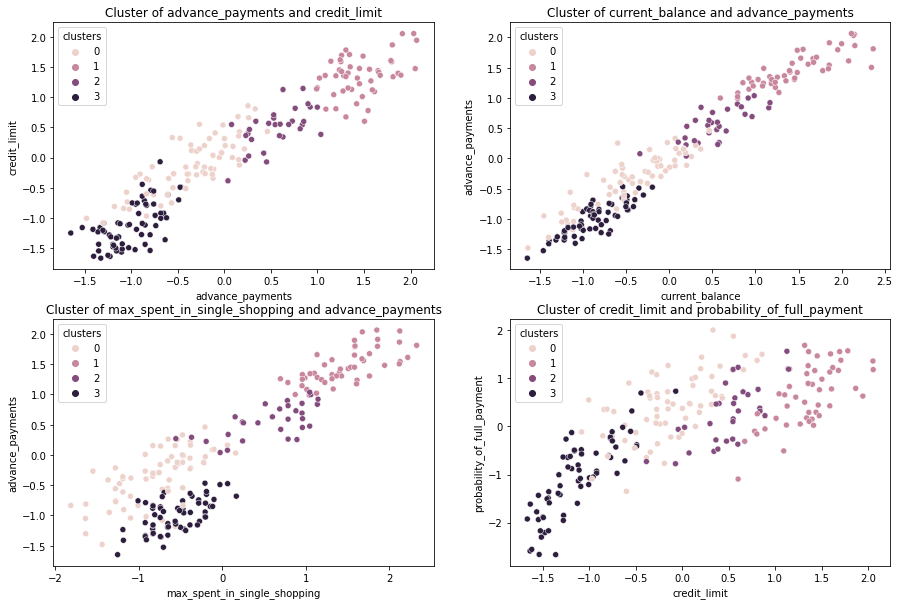

In [43]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.scatterplot(x='advance_payments', y='credit_limit', hue='clusters', data=bank_kmeans)
plt.title('Cluster of advance_payments and credit_limit');

plt.subplot(2,2,2)
sns.scatterplot(x='current_balance', y='advance_payments', hue='clusters', data=bank_kmeans)
plt.title('Cluster of current_balance and advance_payments');

plt.subplot(2,2,3)
sns.scatterplot(x='max_spent_in_single_shopping', y='advance_payments', hue='clusters', data=bank_kmeans)
plt.title('Cluster of max_spent_in_single_shopping and advance_payments');

plt.subplot(2,2,4)
sns.scatterplot(x='credit_limit', y='probability_of_full_payment', hue='clusters', data=bank_kmeans)
plt.title('Cluster of credit_limit and probability_of_full_payment');

# Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

### Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration in days)
7. Destination of the tour (Destination)
8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)
9. The commission received for tour insurance firm (Commission is in percentage of sales)
10.Age of insured (Age)

### 2.1 Read the data and do exploratory data analysis (4 pts). Describe the data briefly. Interpret the inferences for each (2 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [44]:
insurance = pd.read_csv('insurance_part2_data.csv')

In [45]:
insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [46]:
insurance.shape

(3000, 10)

In [47]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [48]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [49]:
insurance.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [50]:
insurance.duplicated().sum()

139

In [51]:
insurance = insurance.drop_duplicates()

In [52]:
insurance['Agency_Code'].value_counts()

EPX    1238
C2B     913
CWT     471
JZI     239
Name: Agency_Code, dtype: int64

In [53]:
insurance['Type'].value_counts()

Travel Agency    1709
Airlines         1152
Name: Type, dtype: int64

In [54]:
insurance['Product Name'].value_counts()

Customised Plan      1071
Bronze Plan           645
Cancellation Plan     615
Silver Plan           421
Gold Plan             109
Name: Product Name, dtype: int64

In [55]:
insurance.Duration = insurance.Duration.replace(-1,0)

In [56]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2861.0,38.204124,10.678106,8.0,31.0,36.00,43.00,84.00
Commision,2861.0,15.080996,25.826834,0.0,0.0,5.63,17.82,210.21
Duration,2861.0,72.120587,135.977013,0.0,12.0,28.00,66.00,4580.00
Sales,2861.0,61.757878,71.399740,0.0,20.0,33.50,69.30,539.00


In [57]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   object 
 2   Type          2861 non-null   object 
 3   Claimed       2861 non-null   object 
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   object 
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   object 
 9   Destination   2861 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 245.9+ KB


# Univariate Analysis

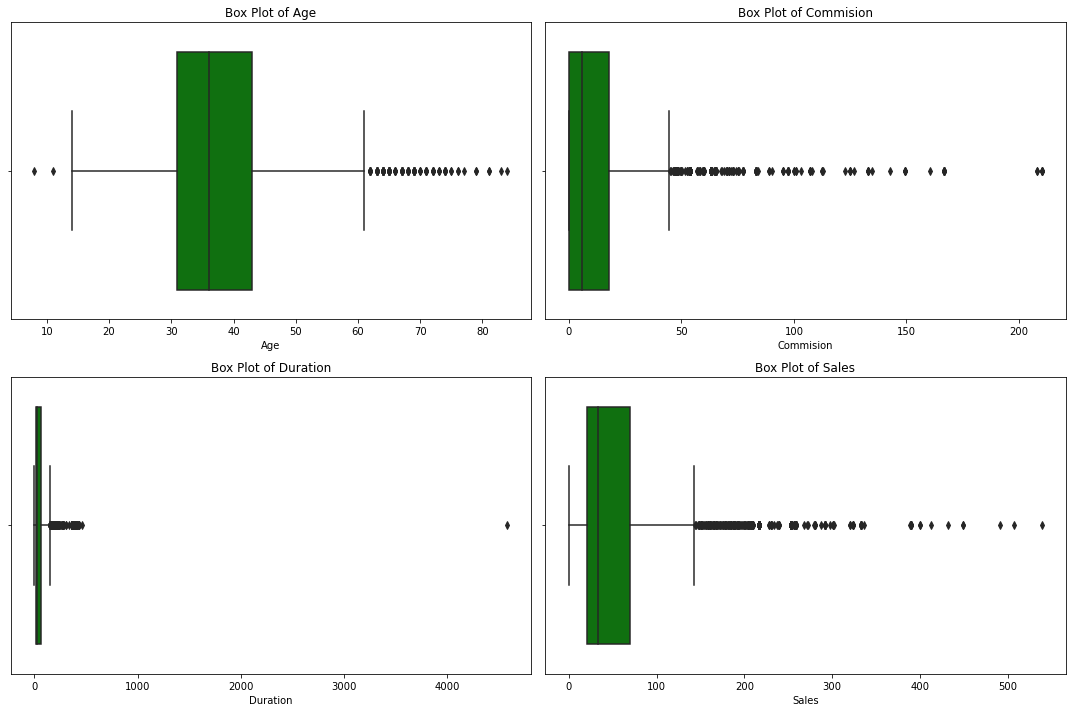

In [58]:
plt.figure(figsize = (15,10))
feature_list = insurance.describe().columns
for i in range(len(feature_list)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=insurance[feature_list[i]],color='g')
    plt.title('Box Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

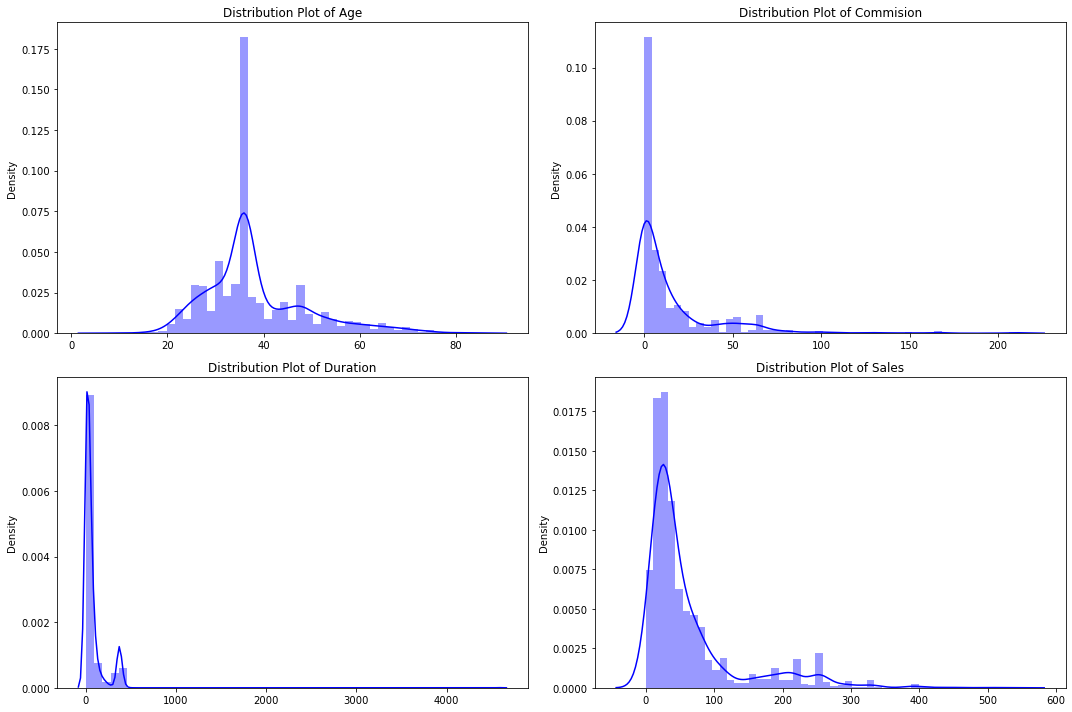

In [59]:
plt.figure(figsize = (15,10))
feature_list = insurance.describe().columns
for i in range(len(feature_list)):
    plt.subplot(2,2,i+1)
    sns.distplot(x=insurance[feature_list[i]], color='b',fit=None)
    plt.title('Distribution Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

# Bivariate

In [60]:
insurance.select_dtypes('object').columns

Index(['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name',
       'Destination'],
      dtype='object')

<AxesSubplot:xlabel='Claimed', ylabel='Commision'>

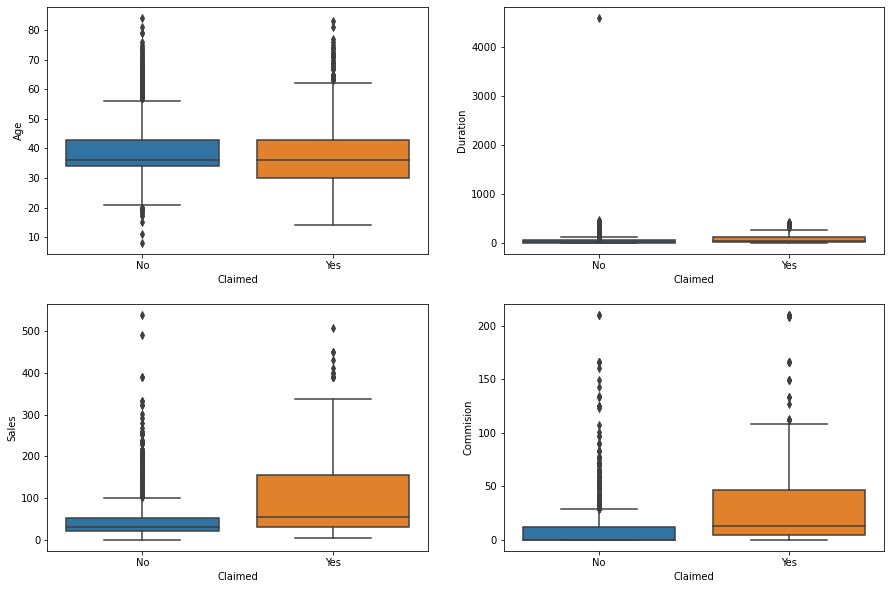

In [61]:
fig,axes = plt.subplots(nrows = 2,ncols = 2)
fig.set_size_inches(15,10)
sns.boxplot(x='Claimed',y='Age',data = insurance,ax=axes[0][0])
sns.boxplot(x='Claimed',y='Duration',data = insurance,ax=axes[0][1])
sns.boxplot(x='Claimed',y='Sales',data = insurance,ax=axes[1][0])
sns.boxplot(x='Claimed',y='Commision',data = insurance,ax=axes[1][1])

<AxesSubplot:xlabel='Agency_Code', ylabel='Commision'>

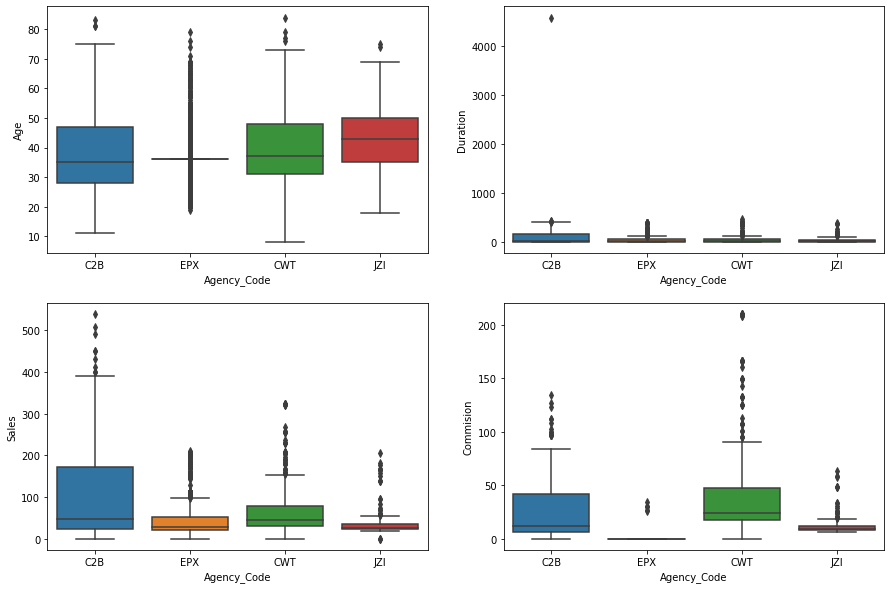

In [62]:
fig,axes = plt.subplots(nrows = 2,ncols = 2)
fig.set_size_inches(15,10)
sns.boxplot(x='Agency_Code',y='Age',data = insurance,ax=axes[0][0])
sns.boxplot(x='Agency_Code',y='Duration',data = insurance,ax=axes[0][1])
sns.boxplot(x='Agency_Code',y='Sales',data = insurance,ax=axes[1][0])
sns.boxplot(x='Agency_Code',y='Commision',data = insurance,ax=axes[1][1])

<AxesSubplot:xlabel='Type', ylabel='Commision'>

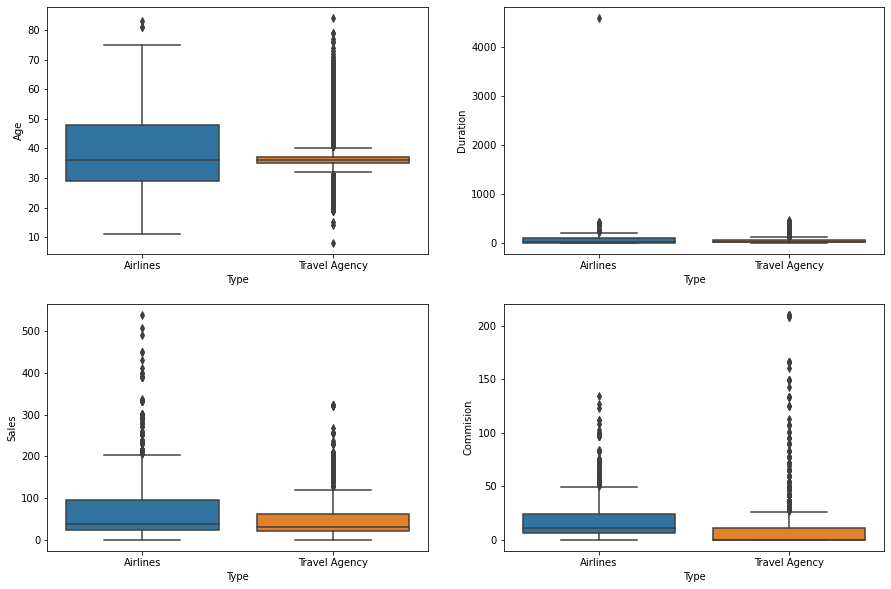

In [63]:
fig,axes = plt.subplots(nrows = 2,ncols = 2)
fig.set_size_inches(15,10)
sns.boxplot(x='Type',y='Age',data = insurance,ax=axes[0][0])
sns.boxplot(x='Type',y='Duration',data = insurance,ax=axes[0][1])
sns.boxplot(x='Type',y='Sales',data = insurance,ax=axes[1][0])
sns.boxplot(x='Type',y='Commision',data = insurance,ax=axes[1][1])

<AxesSubplot:xlabel='Product Name', ylabel='Commision'>

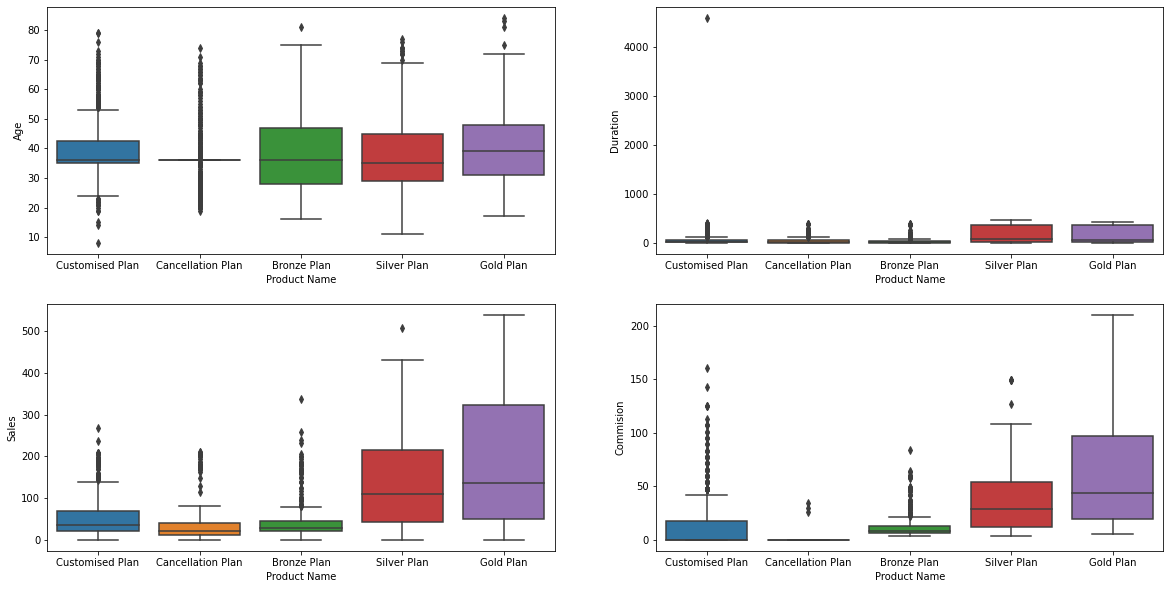

In [64]:
fig,axes = plt.subplots(nrows = 2,ncols = 2)
fig.set_size_inches(20,10)
sns.boxplot(x='Product Name',y='Age',data = insurance,ax=axes[0][0])
sns.boxplot(x='Product Name',y='Duration',data = insurance,ax=axes[0][1])
sns.boxplot(x='Product Name',y='Sales',data = insurance,ax=axes[1][0])
sns.boxplot(x='Product Name',y='Commision',data = insurance,ax=axes[1][1])

<AxesSubplot:xlabel='Channel', ylabel='Commision'>

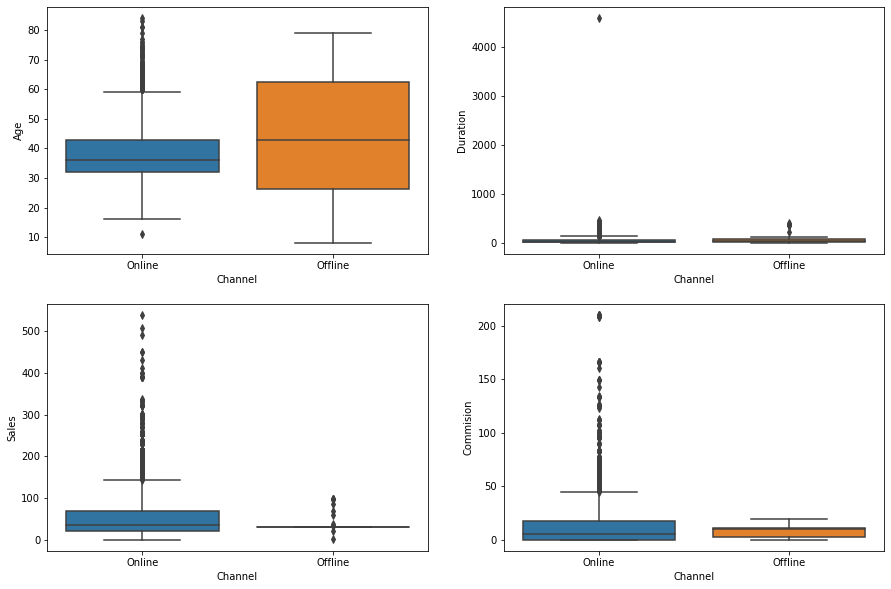

In [65]:
fig,axes = plt.subplots(nrows = 2,ncols = 2)
fig.set_size_inches(15,10)
sns.boxplot(x='Channel',y='Age',data = insurance,ax=axes[0][0])
sns.boxplot(x='Channel',y='Duration',data = insurance,ax=axes[0][1])
sns.boxplot(x='Channel',y='Sales',data = insurance,ax=axes[1][0])
sns.boxplot(x='Channel',y='Commision',data = insurance,ax=axes[1][1])

<AxesSubplot:xlabel='Destination', ylabel='Commision'>

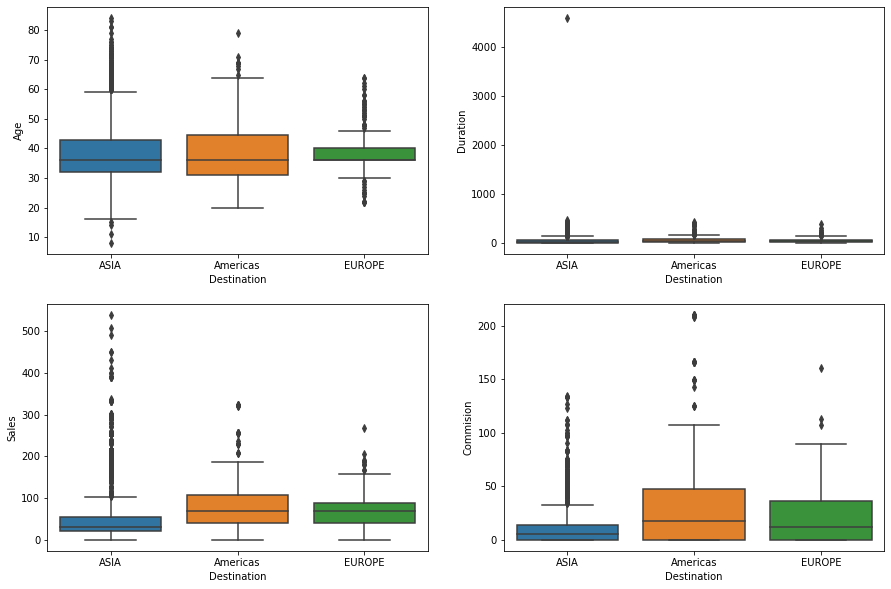

In [66]:
fig,axes = plt.subplots(nrows = 2,ncols = 2)
fig.set_size_inches(15,10)
sns.boxplot(x='Destination',y='Age',data = insurance,ax=axes[0][0])
sns.boxplot(x='Destination',y='Duration',data = insurance,ax=axes[0][1])
sns.boxplot(x='Destination',y='Sales',data = insurance,ax=axes[1][0])
sns.boxplot(x='Destination',y='Commision',data = insurance,ax=axes[1][1])

# Multivariate Analysis

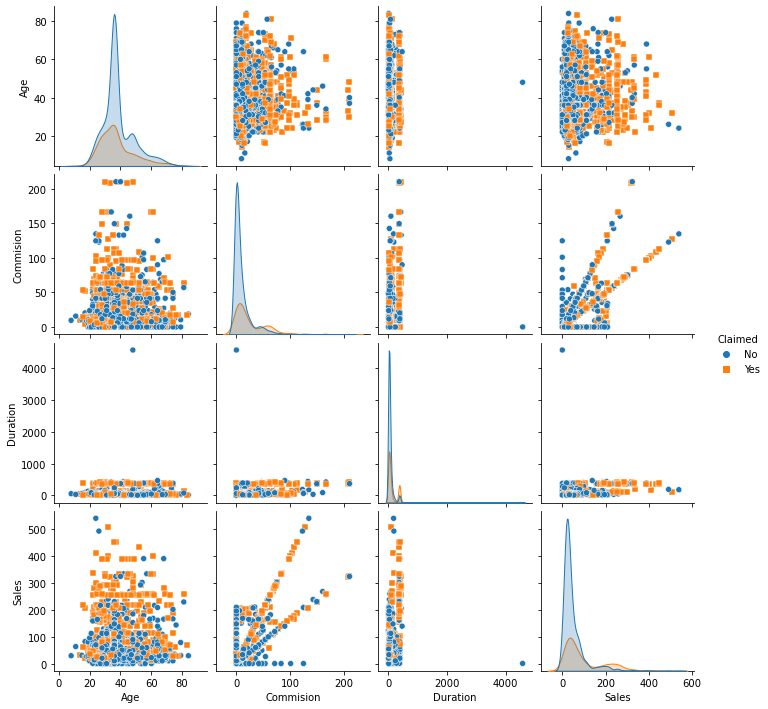

In [67]:
sns.pairplot(insurance, hue="Claimed", markers=["o", "s"])

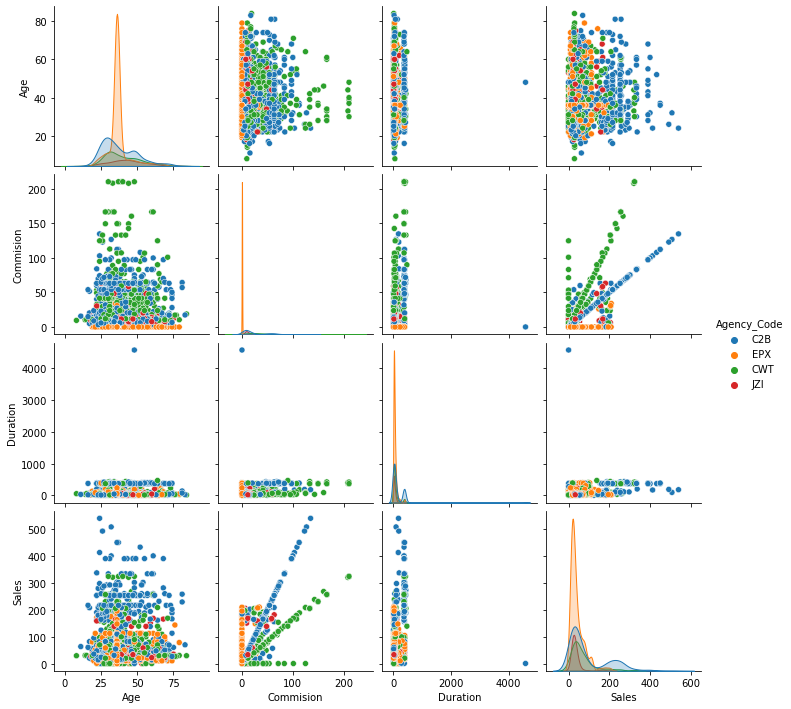

In [68]:
sns.pairplot(insurance, hue="Agency_Code")

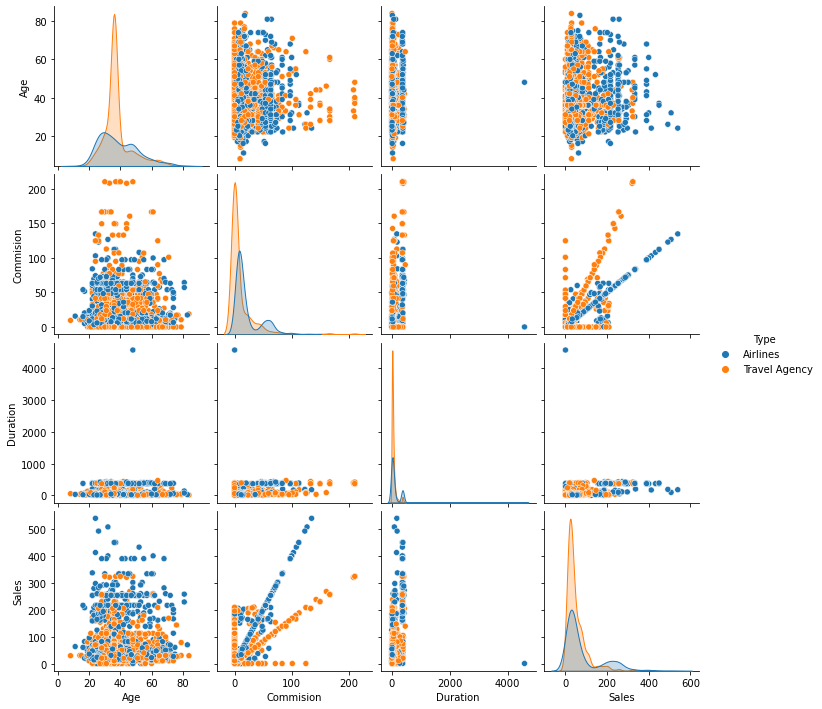

In [69]:
sns.pairplot(insurance, hue="Type")

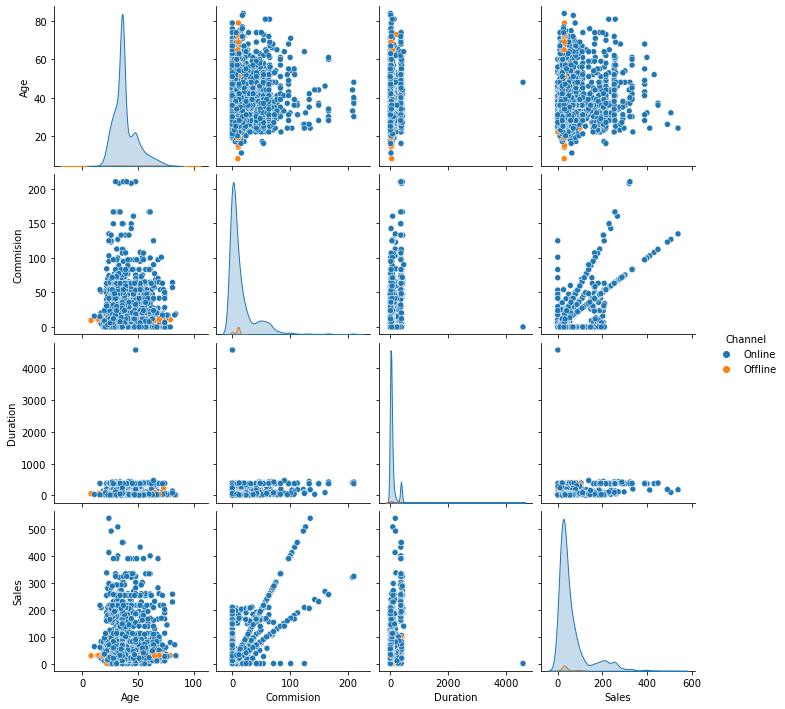

In [70]:
sns.pairplot(insurance, hue="Channel")

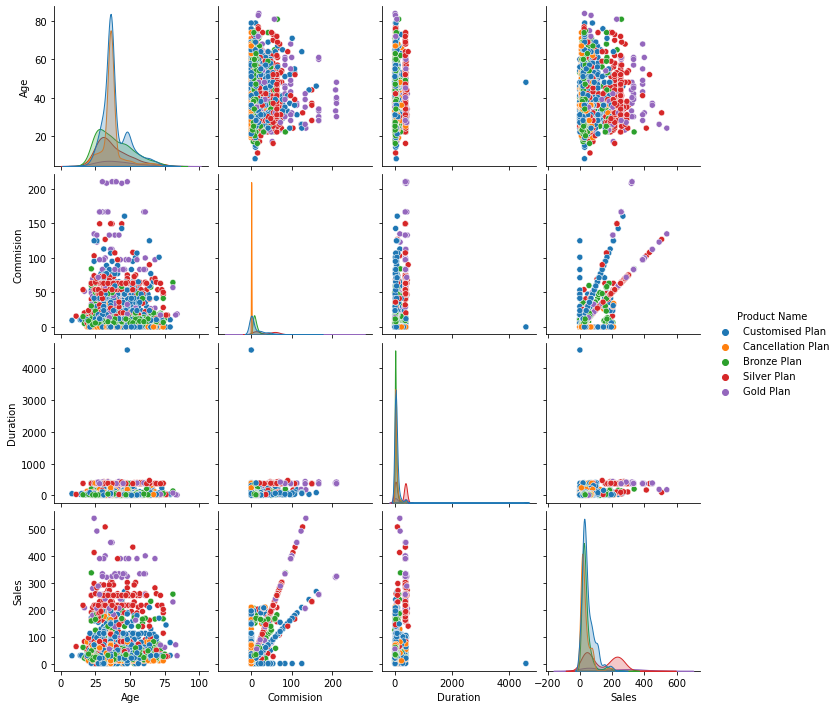

In [71]:
sns.pairplot(insurance, hue="Product Name")

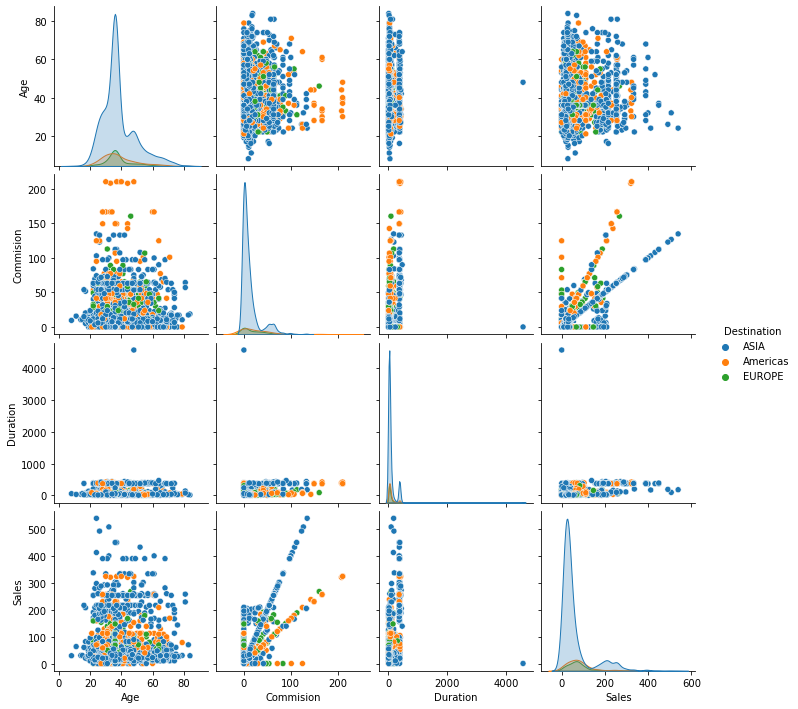

In [72]:
sns.pairplot(insurance, hue="Destination")

<AxesSubplot:>

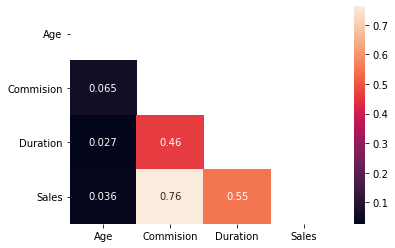

In [73]:
g = insurance.corr()
sns.heatmap(g,annot=True,mask=np.triu(g))

### 2.2 Data Split: Split the data into test and train(1 pts), build classification model CART (1.5 pts), Random Forest (1.5 pts), Artificial Neural Network(1.5 pts). Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed. Any reasonable split is acceptable. Use of random state is mandatory. Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Apply grid search for each model and make models on best_params. Feature importance for each model.

In [74]:
for feature in insurance.select_dtypes('object').columns: 
    if insurance[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(insurance[feature].unique()))
        print(pd.Categorical(insurance[feature].unique()).codes)
        insurance[feature] = pd.Categorical(insurance[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [75]:
x = insurance.drop("Claimed", axis=1)

y = insurance['Claimed']

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [77]:
# Checking dimensions on the train and test data
print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (2002, 9)
x_test:  (859, 9)
y_train:  (2002,)
y_test:  (859,)


## Model

### Decision Tree Classifier

In [78]:
# CART
from sklearn.tree import DecisionTreeClassifier
# Initialise a Decision Tree Classifier
insurance_DTC = DecisionTreeClassifier(criterion = 'gini' )

In [79]:
# Fit the model
insurance_DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [80]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('insurance_Tree_File.dot','w')
dot_data = tree.export_graphviz(insurance_DTC, 
                                out_file=ld_Tree_File, 
                                feature_names = list(x_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()


### Random Forest Classifier

In [81]:
# CART
from sklearn.ensemble import RandomForestClassifier
# Initialise a Decision Tree Classifier
insurance_RFCL = RandomForestClassifier()

In [82]:
# Fit the model
insurance_RFCL.fit(x_train, y_train)

RandomForestClassifier()

### Artificial Neural Networks

In [83]:
from sklearn.preprocessing import StandardScaler
#Initialize an object for StandardScaler
sc = StandardScaler()

In [84]:
#Scale the training data
x_train_ann = sc.fit_transform(x_train)

In [85]:
# Apply the transformation on the test data
x_test_ann = sc.transform(x_test)

## Grid search for Decision Tree Classifier

In [86]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [8,7,6],
    'min_samples_leaf': [30,40,50,60,70,80],
    'min_samples_split': [160,180,170,190]
}

dtc_model = DecisionTreeClassifier()

grid_search_dtc = GridSearchCV(estimator = dtc_model, param_grid = param_grid, cv = 5)

In [87]:
grid_search_dtc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 7, 6],
                         'min_samples_leaf': [30, 40, 50, 60, 70, 80],
                         'min_samples_split': [160, 180, 170, 190]})

In [88]:
grid_search_dtc.best_params_

{'max_depth': 8, 'min_samples_leaf': 30, 'min_samples_split': 160}

In [89]:
best_grid_DTC = grid_search_dtc.best_estimator_

In [90]:
best_grid_DTC

DecisionTreeClassifier(max_depth=8, min_samples_leaf=30, min_samples_split=160)

In [91]:
ytrain_predict_DTC = best_grid_DTC.predict(x_train)
ytest_predict_DTC = best_grid_DTC.predict(x_test)

## Grid search for Random Forest Classifier

In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,6,7],
    'min_samples_leaf': [50,60],
    'min_samples_split': [80,100,110],
    'n_estimators': [100,200]
}

rfcl = RandomForestClassifier()

grid_search_RFCL = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [93]:
grid_search_RFCL.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7], 'min_samples_leaf': [50, 60],
                         'min_samples_split': [80, 100, 110],
                         'n_estimators': [100, 200]})

In [94]:
grid_search_RFCL.best_params_

{'max_depth': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 80,
 'n_estimators': 100}

In [95]:
best_grid_RFCL = grid_search_RFCL.best_estimator_

In [96]:
best_grid_RFCL

RandomForestClassifier(max_depth=6, min_samples_leaf=50, min_samples_split=80)

In [97]:
ytrain_predict_RFCL = best_grid_RFCL.predict(x_train)
ytest_predict_RFCL = best_grid_RFCL.predict(x_test)

## Grid search for Artificial Neural Netwroks

In [98]:
from sklearn.neural_network import MLPClassifier

In [99]:
param_grid = {
    'hidden_layer_sizes': [(100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01,0.001],
    'max_iter' : [5000]
}

ann = MLPClassifier()

grid_search_ann = GridSearchCV(estimator = ann, param_grid = param_grid, cv = 3)

In [100]:
grid_search_ann.fit(x_train_ann, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100)], 'max_iter': [5000],
                         'solver': ['sgd', 'adam'], 'tol': [0.1, 0.01, 0.001]})

In [101]:
best_grid_ann = grid_search_ann.best_estimator_

In [102]:
best_grid_ann

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              max_iter=5000, tol=0.001)

In [103]:
ytrain_predict_ann = best_grid_ann.predict(x_train_ann)
ytest_predict_ann = best_grid_ann.predict(x_test_ann)

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy (1 pts), Confusion Matrix (2 pts), Plot ROC curve and get ROC_AUC score for each model (2 pts), Make classification reports for each model. Write inferences on each model (2 pts). Calculate Train and Test Accuracies for each model. Comment on the validness of models (overfitting or underfitting) Build confusion matrix for each model. Comment on the positive class in hand. Must clearly show obs/pred in row/col Plot roc_curve for each model. Calculate roc_auc_score for each model. Comment on the above calculated scores and plots. Build classification reports for each model. Comment on f1 score, precision and recall, which one is important here.

## Performance Metrics

### Metrics and ROU_AUC of Decision Tree Classifier for training and testing

In [104]:
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion matrix of DTC training')
print(confusion_matrix(y_train,ytrain_predict_DTC))
print('\n')
print('classification report of DTC training')
print(classification_report(y_train,ytrain_predict_DTC))

Confusion matrix of DTC training
[[1178  200]
 [ 230  394]]


classification report of DTC training
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1378
           1       0.66      0.63      0.65       624

    accuracy                           0.79      2002
   macro avg       0.75      0.74      0.75      2002
weighted avg       0.78      0.79      0.78      2002



In [105]:
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion matrix of DTC testing')
print(confusion_matrix(y_test,ytest_predict_DTC))
print('\n')
print('classification report of DTC testing')
print(classification_report(y_test,ytest_predict_DTC))

Confusion matrix of DTC testing
[[474  95]
 [119 171]]


classification report of DTC testing
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       569
           1       0.64      0.59      0.62       290

    accuracy                           0.75       859
   macro avg       0.72      0.71      0.72       859
weighted avg       0.75      0.75      0.75       859



AUC: 0.829


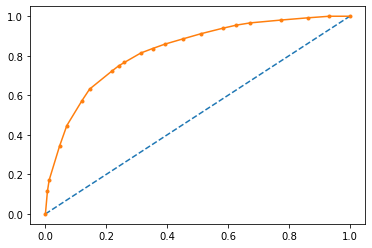

In [106]:
# predict probabilities
probs = best_grid_DTC.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.773


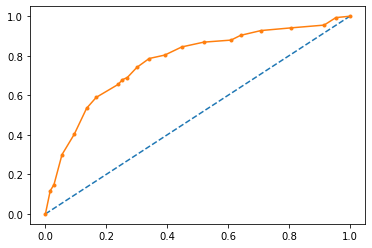

In [107]:
# predict probabilities
probs = best_grid_DTC.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Metrics and ROU_AUC of Random Forest Classifier for training and testing

In [108]:
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion matrix of RFCL training')
print(confusion_matrix(y_train,ytrain_predict_RFCL))
print('\n')
print('classification report of RFCL training')
print(classification_report(y_train,ytrain_predict_RFCL))

Confusion matrix of RFCL training
[[1224  154]
 [ 285  339]]


classification report of RFCL training
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1378
           1       0.69      0.54      0.61       624

    accuracy                           0.78      2002
   macro avg       0.75      0.72      0.73      2002
weighted avg       0.77      0.78      0.77      2002



In [109]:
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion matrix of RFCL testing')
print(confusion_matrix(y_test,ytest_predict_RFCL))
print('\n')
print('classification report of RFCL testing')
print(classification_report(y_test,ytest_predict_RFCL))

Confusion matrix of RFCL testing
[[496  73]
 [138 152]]


classification report of RFCL testing
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       569
           1       0.68      0.52      0.59       290

    accuracy                           0.75       859
   macro avg       0.73      0.70      0.71       859
weighted avg       0.75      0.75      0.75       859



AUC: 0.825


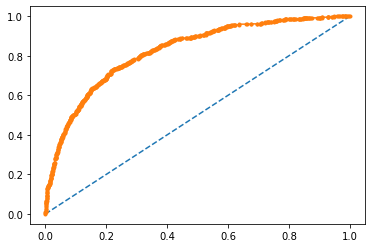

In [110]:
# predict probabilities
probs = best_grid_RFCL.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.802


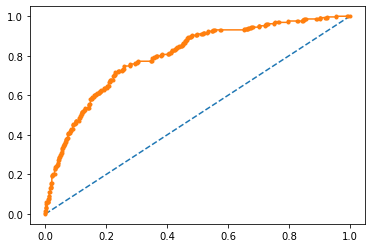

In [111]:
# predict probabilities
probs = best_grid_RFCL.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Metrics and ROU_AUC of Artificial Neural Netwrok for training and testing

In [112]:
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion matrix of ANN training')
print(confusion_matrix(y_train,ytrain_predict_ann))
print('\n')
print('classification report of ANN training')
print(classification_report(y_train,ytrain_predict_ann))

Confusion matrix of ANN training
[[1222  156]
 [ 322  302]]


classification report of ANN training
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1378
           1       0.66      0.48      0.56       624

    accuracy                           0.76      2002
   macro avg       0.73      0.69      0.70      2002
weighted avg       0.75      0.76      0.75      2002



In [113]:
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion matrix of ANN testing')
print(confusion_matrix(y_test,ytest_predict_ann))
print('\n')
print('classification report of ANN testing')
print(classification_report(y_test,ytest_predict_ann))

Confusion matrix of ANN testing
[[496  73]
 [154 136]]


classification report of ANN testing
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       569
           1       0.65      0.47      0.55       290

    accuracy                           0.74       859
   macro avg       0.71      0.67      0.68       859
weighted avg       0.73      0.74      0.72       859



AUC: 0.790


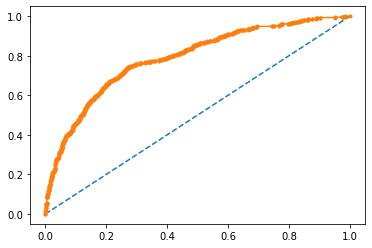

In [114]:
# predict probabilities
probs = best_grid_ann.predict_proba(x_train_ann)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.778


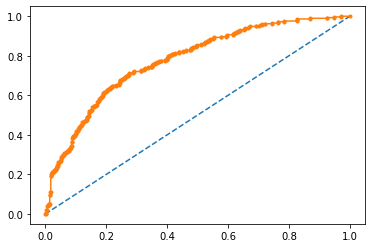

In [115]:
# predict probabilities
probs = best_grid_ann.predict_proba(x_test_ann)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### 2.4 Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner (2.5 pts). Describe on which model is best/optimized (1.5 pts ). A table containing all the values of accuracies, precision, recall, auc_roc_score, f1 score. Comparison between the different models(final) on the basis of above table values. After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.

#### decision tree classifier - Training 79%, Testing 75%, Training AUC 82%, Testing AUC 77%
#### random forest classifier - Training 78%, Testing 75%, Training AUC 82%, Testing AUC 80%
#### neural netwrok - Training 76%, Testing 74%, Training AUC 79%, Testing AUC 77%